In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

In [9]:
path = Path('data') / 'cases.txt'
surg = pd.read_csv(path)

In [12]:
surg.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [16]:
# get the types of procedures
surg['department'].unique()


array(['General surgery', 'Thoracic surgery', 'Urology', 'Gynecology'],
      dtype=object)

<Axes: xlabel='department'>

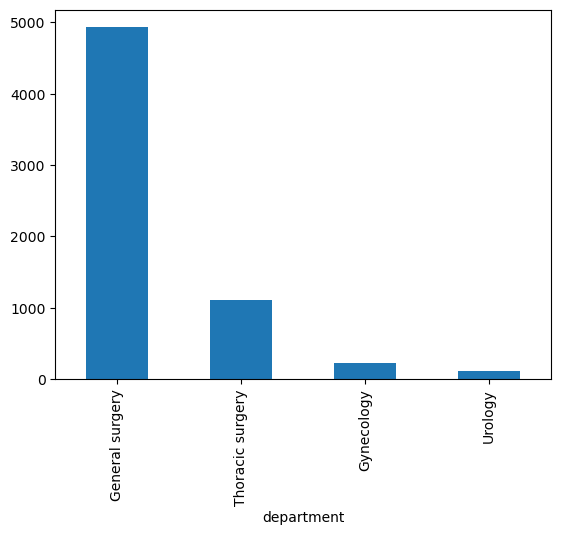

In [17]:
# plot the number of cases per department
surg['department'].value_counts().plot(kind='bar')

In [18]:
surg['optype'].unique()

array(['Colorectal', 'Stomach', 'Biliary/Pancreas', 'Vascular',
       'Major resection', 'Breast', 'Minor resection', 'Transplantation',
       'Hepatic', 'Thyroid', 'Others'], dtype=object)

<Axes: xlabel='optype'>

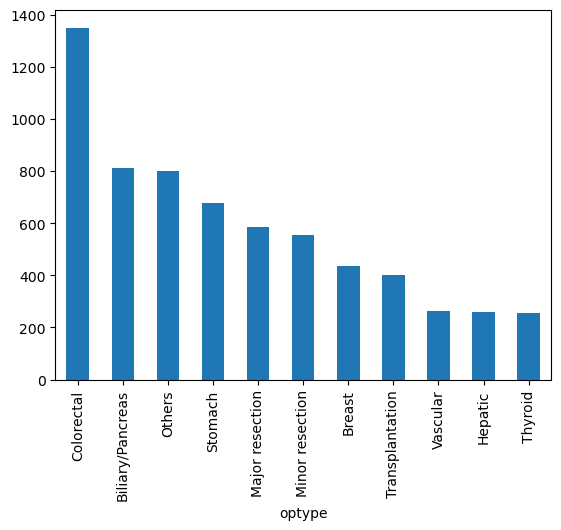

In [20]:
# plot the number of cases per optype
surg['optype'].value_counts().plot(kind='bar')

<Axes: xlabel='optype'>

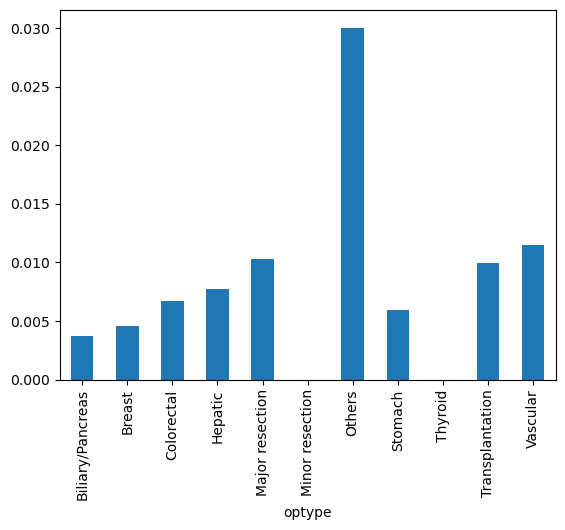

In [22]:
#plot the average 'death_inhosp' per surgery type
surg.groupby('optype')['death_inhosp'].mean().plot(kind='bar')

In [31]:
# how many unique 'dx' with more than one instance are there?
surg['dx'].value_counts()[surg['dx'].value_counts() > 1].count()


np.int64(468)

In [34]:
# display only columns with no missing values
surg.columns[surg.isnull().sum() == 0]

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'emop', 'department', 'optype', 'dx',
       'opname', 'approach', 'ane_type', 'preop_htn', 'preop_dm', 'preop_ecg',
       'preop_pft', 'intraop_rbc', 'intraop_ffp', 'intraop_colloid',
       'intraop_ppf', 'intraop_mdz', 'intraop_ftn', 'intraop_rocu',
       'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intraop_epi',
       'intraop_ca'],
      dtype='object')

In [54]:
# create new variable 'opduration' that is the difference between 
# 'opend' and 'opstart' in hours (current var is in seconds)
surg['opduration'] = (surg['opend'] - surg['opstart']) / 3600

In [56]:
# create 'hospduration' that is the difference between the discharge time 'dis' 
# and admission time 'adm' in minutes (original variables recorded in seconds)
surg['hospduration'] = (surg['dis'] - surg['adm']) /60
# now that hospduration is in minutes, we can convert it to days
surg['hospduration'] = surg['hospduration'] / 1440

In [82]:
# How do hospitalization times and surgery durations vary by operation types?
# map death_inhosp values to "Yes"/"No" before creating the plot
surg['death_display'] = surg['death_inhosp'].map({0: 'No', 1: 'Yes'})

fig = px.scatter(surg, 
                x='opduration', 
                y='hospduration',
                color='optype',
                labels={
                    'opduration': 'Surgery Duration (hours)',
                    'hospduration': 'Days Hospitalized',
                    'optype': 'Operation Type'
                },
                hover_data={
                    'opname': True,
                    'age': True,
                    'sex': True
                },
                custom_data=['death_display'],  # Use the mapped values
                title='Surgery Duration vs Days Hospitalized by Operation Type'
)

fig.update_layout(template='plotly_white')

# Update the hovertemplate with the mapped death values
fig.update_traces(
    hovertemplate=(
        "<b>Operation Name:</b> %{customdata[1]}<br>"
        "<b>Age:</b> %{customdata[2]}<br>"
        "<b>Sex:</b> %{customdata[3]}<br>"
        "<b>Deceased:</b> %{customdata[0]}<br>"
        "<b>Surgery Duration:</b> %{x} hours<br>"
        "<b>Days Hospitalized:</b> %{y} days"
    )
)

fig.show()
fig.write_html('surgery_duration_vs_days_hospitalized.html')

In [83]:
# Update the marker symbol based on the death_display column
surg['marker_symbol'] = surg['death_display'].map({'No': 'Survived', 'Yes': 'Deceased'})

fig = px.scatter(surg, 
                x='opduration', 
                y='hospduration',
                color='optype',
                symbol='marker_symbol',  # Use the new marker_symbol column
                labels={
                    'opduration': 'Surgery Duration (hours)',
                    'hospduration': 'Days Hospitalized',
                    'optype': 'Operation Type'
                },
                hover_data={
                    'opname': True,
                    'age': True,
                    'sex': True
                },
                custom_data=['death_display'],  # Use the mapped values
                title='Surgery Duration vs Days Hospitalized by Operation Type and Mortality'
)

fig.update_layout(template='plotly_white')

# Update the hovertemplate with the mapped death values
fig.update_traces(
    hovertemplate=(
        "<b>Operation Name:</b> %{customdata[1]}<br>"
        "<b>Age:</b> %{customdata[2]}<br>"
        "<b>Sex:</b> %{customdata[3]}<br>"
        "<b>Deceased:</b> %{customdata[0]}<br>"
        "<b>Surgery Duration:</b> %{x} hours<br>"
        "<b>Days Hospitalized:</b> %{y} days"
    )
)

fig.show()
fig.write_html('surgery_duration_vs_days_hospitalized_mortality.html')

In [87]:
# Calculate the percentage of deaths by operation type
death_counts = surg[surg['death_inhosp'] == 1]['optype'].value_counts()
total_deaths = death_counts.sum()
death_percentages = (death_counts / total_deaths) * 100

# Create the pie chart
fig = px.pie(
    values=death_percentages,
    names=death_percentages.index,
    title='Percentage of Deaths by Operation Type',
    labels={'names': 'Operation Type', 'values': 'Percentage of Deaths'}
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(template='plotly_white')

fig.show()
fig.write_html('percentage_of_deaths_by_operation_type.html')

In [7]:
import pandas as pd
import json

# Load the CSV file
file_path = "../durations_andrea.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(columns=['dx', 'icu_days', 'subjectid', 'aneend', 'anestart', 'death_inhosp'], inplace=True)

# Clean and standardize 'opname' and 'optype'
df['opname'] = df['opname'].str.strip().str.lower()
df['optype'] = df['optype'].str.strip().str.lower()

# Calculate duration in hours and hospital stay in days
df['opdur_hours'] = df['opdur_mins'] / 60
df['hospstay_days'] = df['hosp_no_surgery_mins'] / 1440

# Filter out 'others' from 'optype'
df = df[df['optype'].str.lower() != 'others']

# Aggregate main data by 'optype'
main_data = df.groupby("optype").agg(
    surgery=("opdur_hours", "mean"),
    stay=("hospstay_days", "mean")
).reset_index()
main_data['optype'] = main_data['optype'].str.title()

# Aggregate sub-data by 'optype' and 'opname', ensuring unique 'opname' within each 'optype'
sub_data = df.groupby(["optype", "opname"]).agg(
    surgery=("opdur_hours", "mean"),
    stay=("hospstay_days", "mean")
).reset_index()

# Clean and standardize 'optype' and 'opname' in sub_data
sub_data['optype'] = sub_data['optype'].str.title()
sub_data['opname'] = sub_data['opname'].str.title()

# Convert to hierarchical dictionary
hierarchical_data = {"name": "root", "children": []}

for optype, group in sub_data.groupby("optype"):
    # Ensure unique 'opname' within each 'optype' group
    unique_group = group.drop_duplicates(subset=["opname"])
    children = [
        {"name": row["opname"], "surgery": row["surgery"], "stay": row["stay"]}
        for _, row in unique_group.iterrows()
    ]
    hierarchical_data["children"].append({"name": optype, "children": children})

# Save to JSON
sub_data_path = "../data/sub_durations_data.json"
with open(sub_data_path, "w") as f:
    json.dump(hierarchical_data, f, indent=4)

print(f"Hierarchical JSON saved to {sub_data_path}")

Hierarchical JSON saved to ../data/sub_durations_data.json
